In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('./merge.csv')

In [7]:
data['id_label1']=data.apply(lambda x: int('1') if x['cust_id'][0:2]=='jd' else int('0'), axis=1)
data['id_label2']=data.apply(lambda x: int('2') if x['cust_id'][-2:]=='_p' else int('0'), axis=1)
data['id_label3']=data.apply(lambda x: int('3') if x['cust_id'][0:2]=='u_' else int('0'), axis=1)
data['id_label']=data['id_label1']+data['id_label2']+data['id_label3']

In [9]:
print(data['id_label'].value_counts())

1    5723
0    3400
2     846
3      31
Name: id_label, dtype: int64


In [3]:
data['label'].corr(data['apply_dateDT'],method="pearson")

0.02192146172885826

Text(0.5, 1.0, 'Distribution of apply_date dates')

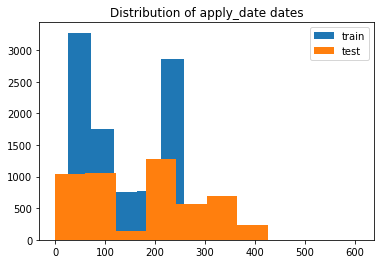

In [3]:
data_train = pd.read_csv('./merge.csv')
data = pd.read_csv('test/test_apply.txt')
data['apply_date'] = pd.to_datetime(data['apply_date'],format='%Y-%m-%d %H:%M:%S')
startdate = datetime.datetime.strptime('2019-03-01 01:01:01', '%Y-%m-%d %H:%M:%S')
data['apply_dateDT'] = data['apply_date'].apply(lambda x: x-startdate).dt.days

data['apply_amount']=data['apply_amount'].apply(lambda x: int(x)/100)
def func_DT_max(data):
    data['maxDT'] = data['apply_date'].min()
    return data
data=data.groupby('cust_id').apply(func_DT_max)
data['maxDT']=data.apply(lambda x: '1' if x['maxDT']==x['apply_date'] else '0', axis=1) 
data=data[~data['maxDT'].isin(['0'])]

import matplotlib.pyplot as plt
plt.hist(data_train['apply_dateDT'], label='train')
plt.hist(data['apply_dateDT'], label='test')
plt.legend()
plt.title('Distribution of apply_date dates')